[Reference](https://medium.com/@francescofranco_39234/categorical-crossentropy-with-keras-2ac52d5351b0)

Feature shape: (2,)


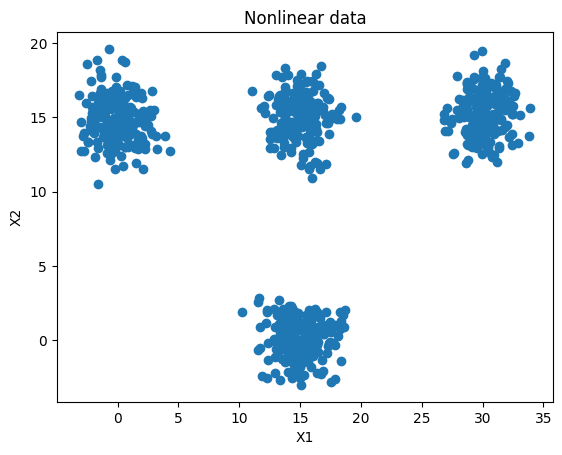

Epoch 1/30
120/120 [==============================] - 1s 5ms/step - loss: 9.9768 - accuracy: 0.3200 - val_loss: 2.1649 - val_accuracy: 0.4867
Epoch 2/30
120/120 [==============================] - 1s 6ms/step - loss: 1.1057 - accuracy: 0.6100 - val_loss: 0.5982 - val_accuracy: 0.7533
Epoch 3/30
120/120 [==============================] - 1s 7ms/step - loss: 0.4306 - accuracy: 0.7883 - val_loss: 0.3297 - val_accuracy: 0.8200
Epoch 4/30
120/120 [==============================] - 1s 10ms/step - loss: 0.2650 - accuracy: 0.9900 - val_loss: 0.2165 - val_accuracy: 1.0000
Epoch 5/30
120/120 [==============================] - 1s 6ms/step - loss: 0.1849 - accuracy: 0.9983 - val_loss: 0.1563 - val_accuracy: 1.0000
Epoch 6/30
120/120 [==============================] - 0s 4ms/step - loss: 0.1358 - accuracy: 0.9983 - val_loss: 0.1264 - val_accuracy: 1.0000
Epoch 7/30
120/120 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.9983 - val_loss: 0.0956 - val_accuracy: 1.0000
Epoch

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


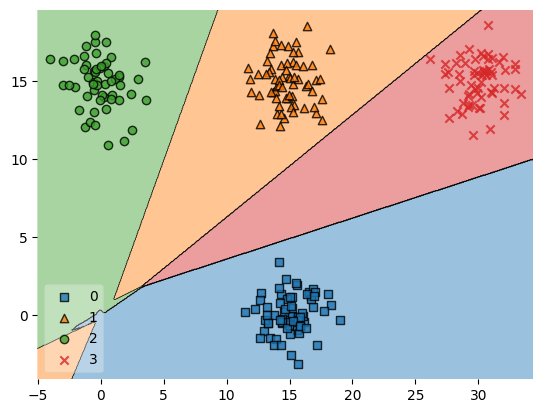

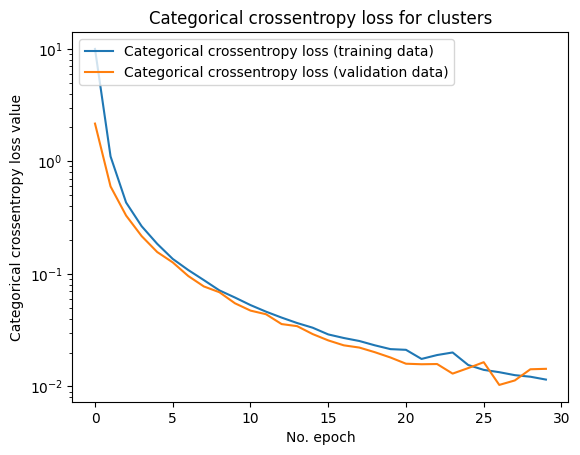

In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions

# Configuration options
num_samples_total = 1000
training_split = 250
cluster_centers = [(15,0), (15,15), (0,15), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = CategoricalCrossentropy(from_logits=True)

# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1.5)
categorical_targets = to_categorical(targets)
X_training = X[training_split:, :]
X_testing = X[:training_split, :]
Targets_training = categorical_targets[training_split:]
Targets_testing = categorical_targets[:training_split].astype(np.int32)

# Set shape based on data
feature_vector_length = len(X_training[0])
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Generate scatter plot for training data
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Nonlinear data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Create the model
model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='linear'))

# Configure the model and start training
model.compile(loss=loss_function_used, optimizer=tensorflow.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

'''
  The Onehot2Int class is used to adapt the model so that it generates non-categorical data.
  This is required by the `plot_decision_regions` function.
  The code is courtesy of dr. Sebastian Raschka at https://github.com/rasbt/mlxtend/issues/607.
  Copyright (c) 2014-2016, Sebastian Raschka. All rights reserved. Mlxtend is licensed as https://github.com/rasbt/mlxtend/blob/master/LICENSE-BSD3.txt.
  Thanks!
'''
# No hot encoding version
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

# fit keras_model
keras_model_no_ohe = Onehot2Int(model)

# Plot decision boundary
plot_decision_regions(X_testing, np.argmax(Targets_testing, axis=1), clf=keras_model_no_ohe, legend=3)
plt.show()
'''
  Finish plotting the decision boundary.
'''

# Visualize training process
plt.plot(history.history['loss'], label='Categorical crossentropy loss (training data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy loss (validation data)')
plt.title('Categorical crossentropy loss for clusters')
plt.ylabel('Categorical crossentropy loss value')
plt.yscale('log')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()